# 검증용 데이터셋 준비

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
images_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/input/'

# Google OCR API

In [4]:
# 필요 패키지 설치
!pip install --upgrade google-api-python-client
!pip install google-cloud-vision

     |████████████████████████████████| 7.5 MB 5.4 MB/s 
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.278 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 2.21.0 which is incompatible.
     |████████████████████████████████| 369 kB 5.5 MB/s 
     |████████████████████████████████| 42 kB 941 kB/s 


In [6]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [50]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  '/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/rich-charmer-295403-6c6b4b6826e1.json'

# OCR API 이용 함수 호출
for img in os.listdir(images_path):
  detect_text(images_path + img)
  print('-------------')

Texts:

"UNIVER S
150
YEARS
OF
150
GIANT LEAPS
EARS
GIANT LEAPS
EAP
CLASS
OF
CLASS
1958
OF
1959
"

"UNIVER"

"S"

"150"

"YEARS"

"OF"

"150"

"GIANT"

"LEAPS"

"EARS"

"GIANT"

"LEAPS"

"EAP"

"CLASS"

"OF"

"CLASS"

"1958"

"OF"

"1959"
bounds: (3577,1964),(3637,1961),(3638,1986),(3578,1989)
-------------
Texts:

"FRANCE A. CORDOVARECREATIONAL SPORTS CENTER
"

"FRANCE"

"A."

"CORDOVARECREATIONAL"

"SPORTS"

"CENTER"
bounds: (203,86),(230,85),(230,95),(203,96)
-------------
Texts:

"PURDUE
UNIVERSI TY.
College of Engineering
"

"PURDUE"

"UNIVERSI"

"TY."

"College"

"of"

"Engineering"
bounds: (152,137),(214,137),(214,150),(152,150)
-------------
Texts:

"PURDUE
UNIVERSITY
GLOBAL
"

"PURDUE"

"UNIVERSITY"

"GLOBAL"
bounds: (83,147),(173,122),(178,143),(89,168)
-------------
Texts:

"PURDUE
UNIVERSITY.
"

"PURDUE"

"UNIVERSITY."
bounds: (51,131),(259,131),(259,147),(51,147)
-------------
Texts:

"MAINE Cn TP
PROTECT
PURDUE
PERIRIT
RUTNT
"

"MAINE"

"Cn"

"TP"

"PROTECT"

"PURDUE"

"P

# keras-ocr

In [25]:
# 필요 패키지 설치
!pip install keras_ocår

     |████████████████████████████████| 57 kB 2.8 MB/s 
     |████████████████████████████████| 9.5 MB 7.6 MB/s 
     |████████████████████████████████| 869 kB 34.9 MB/s 
     |████████████████████████████████| 123 kB 50.2 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.7-py3-none-any.whl size=43748 sha256=0ae3e7003c6d444d9070e2bafec02896625e1a8bb6056c1f44fc47ecbd128252
  Stored in directory: /root/.cache/pip/wheels/e4/e4/f3/05528293e01d7fa089343d5a5fd63dd07d79f57103fe9fc159
Successfully built keras-ocr


In [26]:
import matplotlib.pyplot as plt
import keras_ocr

# detector과 recognizer 모델 다운로드
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [51]:
# 테스트 이미지 
# image_urls = [
#   'https://source.unsplash.com/M7mu6jXlcns/640x460',
#   'https://source.unsplash.com/6jsp4iHc8hI/640x460',
#   'https://source.unsplash.com/98uYQ-KupiE',
#   'https://source.unsplash.com/j9JoYpaJH3A',
#   'https://source.unsplash.com/eBkEJ9cH5b4'
# ]

images = [ keras_ocr.tools.read(images_path+img) for img in os.listdir(images_path)]
prediction_groups = [pipeline.recognize([images_path+img]) for img in os.listdir(images_path)]

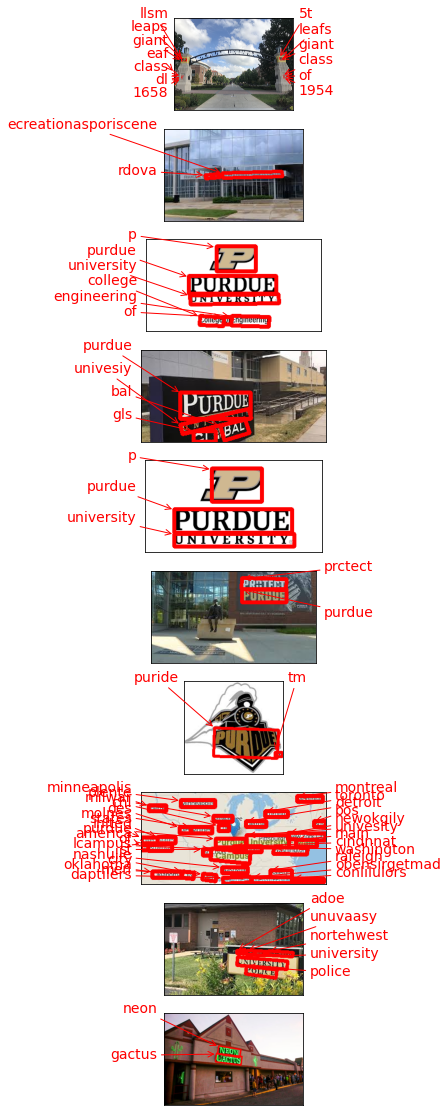

In [52]:
# predictions 시각화
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# Tesseract

In [30]:
# 필요 패키지 설치
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=a0ef12068430250a52bbec08aaac8287fef33ae02c7b7d3f6f77b6dbca20e8cf
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [55]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

output_img_file_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img'

cropped_image_path_lists = []
for cnt, img in enumerate(os.listdir(images_path)):
  cropped_image_path_lists.append(crop_word_regions(images_path+img, output_img_file_path+str(cnt+1)))

/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0000.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0001.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0002.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0003.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0004.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0005.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img2/0000.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img3/0000.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img3/0001.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img3/0002.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img3/0003.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img3/0004.png
/con

In [56]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
for cropped_list in cropped_image_path_lists:
  recognize_images(cropped_list)
  print('--------------------')


ANT

PEARS

GIANT

IFAPS


Done
--------------------
ami

Done
--------------------
ia

PURDUE,

UNI VERSIT ¥

College

OT

Engineering

Done
--------------------

Done
--------------------
ia

PURDUE

UNIVERSITY

Done
--------------------
a

ee

ae


——

Done
--------------------

Done
--------------------
;

2

Diarre

Minneapolis

\

AI

loronto

Detroit

es

Voines

Chile, Detroinn™

ited

States

DP

of America

Kinannah 8 Wa

Nachville

Okiahoma

Lity

MENT

MaepTiieré

Jpensl

: .

reelhap

cCorniuiputors

Done
--------------------
—

Done
--------------------
Gok -

Done
--------------------


# 테스트 결과

In [60]:
# 코드 실행 시간을 비교를 위함
import time

## Google OCR API

찾은 글자를 출력하는데 세 개의 API 중 가장 높은 정확도를 보였다.

In [61]:
# Google OCR API 시각화
start = time.time()

for img in os.listdir(images_path):
  detect_text(images_path + img)
  print('-------------')

print(time.time() - start)

Texts:

"UNIVER S
150
YEARS
OF
150
GIANT LEAPS
EARS
GIANT LEAPS
EAP
CLASS
OF
CLASS
1958
OF
1959
"

"UNIVER"

"S"

"150"

"YEARS"

"OF"

"150"

"GIANT"

"LEAPS"

"EARS"

"GIANT"

"LEAPS"

"EAP"

"CLASS"

"OF"

"CLASS"

"1958"

"OF"

"1959"
bounds: (3577,1964),(3637,1961),(3638,1986),(3578,1989)
-------------
Texts:

"FRANCE A. CORDOVARECREATIONAL SPORTS CENTER
"

"FRANCE"

"A."

"CORDOVARECREATIONAL"

"SPORTS"

"CENTER"
bounds: (203,86),(230,85),(230,95),(203,96)
-------------
Texts:

"PURDUE
UNIVERSI TY.
College of Engineering
"

"PURDUE"

"UNIVERSI"

"TY."

"College"

"of"

"Engineering"
bounds: (152,137),(214,137),(214,150),(152,150)
-------------
Texts:

"PURDUE
UNIVERSITY
GLOBAL
"

"PURDUE"

"UNIVERSITY"

"GLOBAL"
bounds: (83,147),(173,122),(178,143),(89,168)
-------------
Texts:

"PURDUE
UNIVERSITY.
"

"PURDUE"

"UNIVERSITY."
bounds: (51,131),(259,131),(259,147),(51,147)
-------------
Texts:

"MAINE Cn TP
PROTECT
PURDUE
PERIRIT
RUTNT
"

"MAINE"

"Cn"

"TP"

"PROTECT"

"PURDUE"

"P

## keras-ocr <br/>

찾은 글자를 사진에 직접 표시하여 주고, 직사각형의 바운딩 박스로 사진에 표시되어 사진에 모든 정보를 포함하여 보여준다.

0.3979358673095703


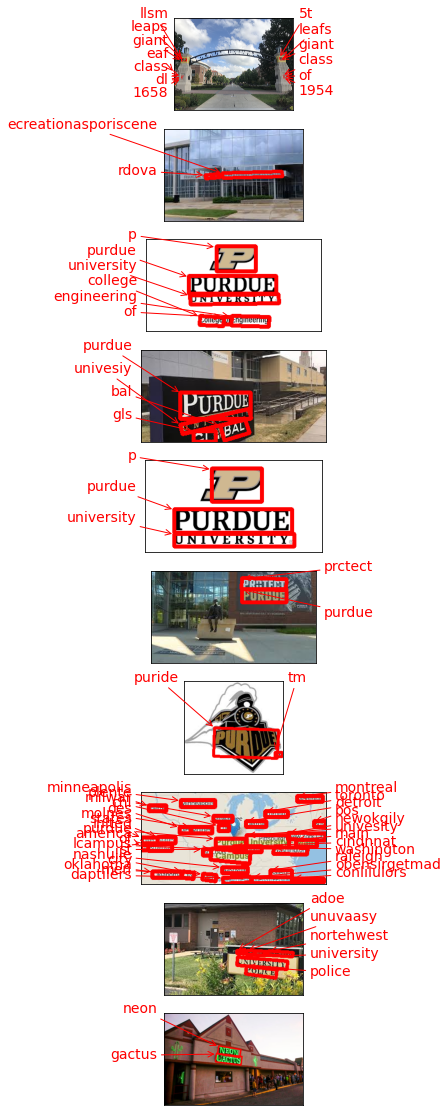

In [62]:
# predictions 시각화
start = time.time()

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

print(time.time() - start)

## Tesseract<br/>

찾은 글자들를 출력해주고, 글자를 찾은 부분들을 이미지에서 잘라내서 로컬에 저장하도록 한다.

In [63]:
start = time.time()
for cnt, img in enumerate(os.listdir(images_path)):
  cropped_image_path_lists.append(crop_word_regions(images_path+img, output_img_file_path+str(cnt+1)))

# Tesseract 시각화
for cropped_list in cropped_image_path_lists:
  recognize_images(cropped_list)
  print('--------------------')

print(time.time()-start)

/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0000.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0001.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0002.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0003.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0004.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img1/0005.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img2/0000.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img3/0000.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img3/0001.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img3/0002.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img3/0003.png
/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/E18/output/img3/0004.png
/con

# 결과 분석과 결론 제시<br/>

- 구현하고자 하는 서비스의 목적과 내용
  - 자율주행 시스템에서 네이게이션을 따라 차가 이동할 때, 차량의 GPS기술을 보완하기 위해 표지판을 읽어 맞는 위치인지 판단한다.
- OCR 모델  평가 기준
  - 정확도와 빠른 실행 시간이 가장 중요하다.
- 최적의 모델 선정
  - 실행 시간
    - Google OCR API: 6.20초
    - keras-ocr: 0.39초
    - Tesseract: 42.13초
  - 결론: 자율주행 시스템에서는 빠른 실행 시간이 상당히 중요하다. 따라서 keras-ocr을 사용한 뒤 부정확성은 RNN을 통한 단어 보정으로 해결을 해야할것 같다.

# 회고
- 이번 프로젝트에서 어려웠던 점
  - 이번 프로젝트에는 어려웠던 점이 딱히 없었던 것 같다.
- 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
  - OCR은 computer vision과 관련이 있어서 CNN 관련 모델들만 사용할 줄 알았는데, RNN을 통해 단어 인식을 하는 것을 알게 되었다.
- 자기 다짐
  - Exploration 자료에서 나왔던 네이버 컨퍼런스에서 많은 인사이트(논문 활용법 등)를 얻을 수 있어서 다양한 컨퍼런스들을 찾아보고 앞으로의 개발에 참고해야겠다.